## Introduction
The aim of this project is to put into practice what I have learned in the "wrangling data" section of the Udacity Data Analysis Nanodegree programme. The dataset is the archive of tweets from the Twitter user @dog_rates, also known as WeRateDogs.

In [130]:
#Importing  all packages to be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import os
import seaborn as sns

In [3]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

### Twitter API

In [18]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


2356

In [29]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet-json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [32]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [33]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

### Assessing the data

In [34]:
twitter_data.head(5) 

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [35]:
twitter_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [36]:
image_prediction.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
image_prediction.duplicated().sum() 

0

In [38]:
twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe() 

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [40]:
twitter_archive.rating_numerator.value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [41]:
twitter_archive.rating_denominator.value_counts() 

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [42]:
twitter_archive.source.value_counts() 

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [43]:
twitter_archive.name.value_counts() 

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [44]:
twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [46]:
image_prediction.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
image_prediction.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
twitter_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Quality issues

#### Twitter archive table

1. Keep original ratings (no retweets) that have images
2. drop columns not needed for our analysis
3. Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)
4. Correct numerators with decimals
5. Missing values in 'name' and dog stages represented as 'None'
6. Some records have more than on dog stage
7. Missing URLs in expanded_urls
8. Source column is in HTML-formatted string, not a normal string
9. Error in dog names (e.g a,an,actually) are not a dog's name.
10. Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.
11. text column includes a text and a short link.


#### Image prediction table

1. Erroneous datatype (tweet_id)
2. Missing images (only 2075 counts out of possible 2356)
 


#### Twitter API table

1. Erroneous datatype (tweet_id)
2. Missing tweets

### Clean

In [49]:
# Making copies to preserve the original datasets
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()

In [50]:
archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### define

Keeping original ratings of number of retweets that have images

##### Code

In [52]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

##### Test

In [53]:
#confirming the changes
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


##### Define
 


Erroneous datatype fix


##### Code

In [76]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

##### test

In [77]:
#confirming the changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 253.8+ KB


#### define

Correct numerators with decimals

##### Code

In [78]:
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\JD91F~1.NDA\AppData\Local\Temp/ipykernel_19136/1933527640.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


##### Define

Now that we know the affected rows that didnt extract properly, lets fix that.

##### Code

In [79]:
# convert to float datatype
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#update values
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

##### test

In [80]:
#confirm changes
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\JD91F~1.NDA\AppData\Local\Temp/ipykernel_19136/3144054984.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


##### Define

Incorrect dog names.

In [83]:
archive_clean.name.unique() 

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

#### Code

In [84]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None' 

C:\Users\JD91F~1.NDA\AppData\Local\Temp/ipykernel_19136/648764250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'


##### Test

In [85]:
 # confirming changes
archive_clean.name.value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

##### define

Some of the records have more than one dog stage

##### Code

In [86]:
archive_clean['add_all'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo 

In [87]:
archive_clean.add_all.value_counts() 

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: add_all, dtype: int64

In [88]:
# creating a function to check dog stages
def check_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

archive_clean['dog_stage'] = archive_clean.apply(check_stages, axis=1)

##### Test

In [89]:
archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  add_all             2175 non-null   object             
 12  dog_stage           2175 non-null 

##### Define

Dropping unused columns


##### Code

In [90]:
 # drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'add_all'], axis=1, inplace=True)

In [93]:
# convert to category datatype 
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

##### test

In [94]:
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stage           2175 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 188.1+ KB


In [95]:
# matched deleted columns
archive_clean.dog_stage.value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

In [96]:
archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stage           2175 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 188.1+ KB


##### Define

Source column is in HTML-formatted string, not a normal string

##### Code

In [97]:
#extract values
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

##### Test

In [98]:
#confirm changes
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Define

Removing hyperlinks in tweets.


##### Code

In [100]:
#define function and apply to archive_clean table
def htmllink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
archive_clean.text = archive_clean.text.apply(htmlink)

##### Test

In [101]:
#confirm changes to show no hyperlink in column again
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

## Tidiness


##### Define

Moving twitter api table and image prediction table to twitter archive table.


##### Code

In [102]:
#merge the two tables
archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')

##### Test

In [103]:
 # confirming changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_stage           2175 non-null   category           
 8   retweet_count       2173 non-null   float64            
 9   favorite_count      2173 non-null   float64            
 10  followers_count     2173 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

##### Define

Lets drop tweets with no images

##### Code

In [105]:
 # drop rows with no image
archive_clean.dropna(axis = 0, inplace=True)

##### Test

In [106]:
archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2172
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   rating_numerator    1992 non-null   float64            
 5   rating_denominator  1992 non-null   float64            
 6   name                1992 non-null   object             
 7   dog_stage           1992 non-null   category           
 8   retweet_count       1992 non-null   float64            
 9   favorite_count      1992 non-null   float64            
 10  followers_count     1992 non-null   float64            
 11  jpg_url             1992 non-null   object             
 12  img_num             1992 non-null 

### Saving cleaned data


In [107]:
archive_clean.to_csv('twitter_archive_master.csv', index=False) 

### Analysis and visualization

In [108]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv') 

In [109]:
twitter_archive_master.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1992 non-null   int64  
 1   timestamp           1992 non-null   object 
 2   source              1992 non-null   object 
 3   text                1992 non-null   object 
 4   rating_numerator    1992 non-null   float64
 5   rating_denominator  1992 non-null   float64
 6   name                1992 non-null   object 
 7   dog_stage           1992 non-null   object 
 8   retweet_count       1992 non-null   float64
 9   favorite_count      1992 non-null   float64
 10  followers_count     1992 non-null   float64
 11  jpg_url             1992 non-null   object 
 12  img_num             1992 non-null   float64
 13  p1                  1992 non-null   object 
 14  p1_conf             1992 non-null   float64
 15  p1_dog              1992 non-null   bool   
 16  p2    

We have to change our types back because they have lost them after saving in csv.


In [110]:
# Change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [111]:
twitter_archive_master.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   category           
 3   text                1992 non-null   object             
 4   rating_numerator    1992 non-null   float64            
 5   rating_denominator  1992 non-null   float64            
 6   name                1992 non-null   object             
 7   dog_stage           1992 non-null   category           
 8   retweet_count       1992 non-null   int32              
 9   favorite_count      1992 non-null   int32              
 10  followers_count     1992 non-null   int32              
 11  jpg_url             1992 non-null   object             
 12  img_num             1992 non-null 

### Most frequently used Twitter source

In [112]:
source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

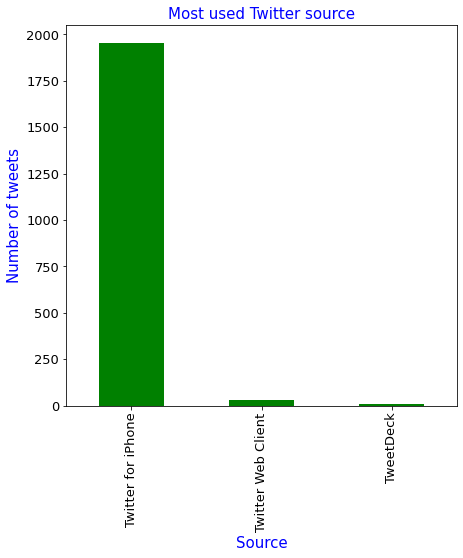

In [116]:
 #plot
p_bar = source.plot.bar(color = 'green', fontsize = 13)

#figure size(width, height)
p_bar.figure.set_size_inches(7, 7);

#Add labels
plt.title('Most used Twitter source', color = 'blue', fontsize = '15')
plt.xlabel('Source', color = 'blue', fontsize = '15')
plt.ylabel('Number of tweets', color = 'blue', fontsize = '15');

### WeRateDogs Retweet over time?

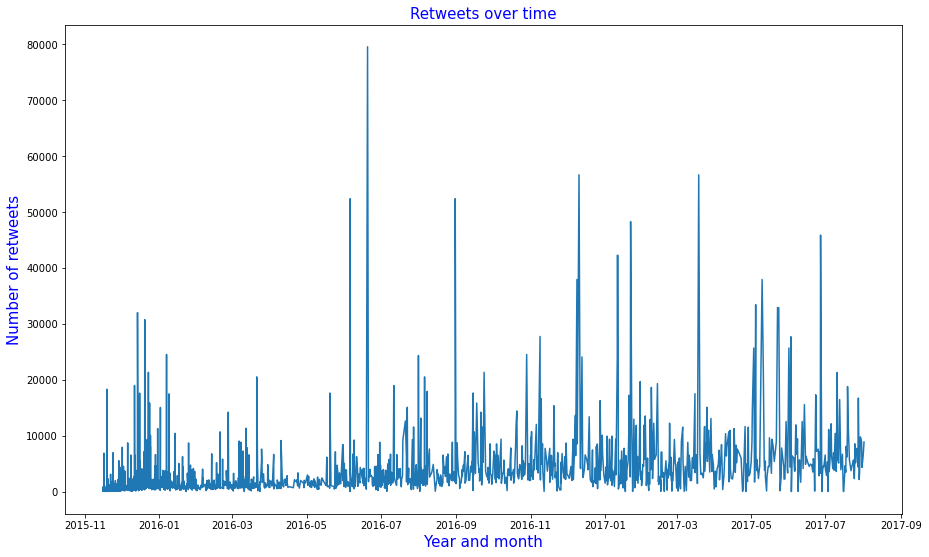

In [120]:
#plot
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweet_count)
plt.title('Retweets over time', color = 'blue', fontsize = '15')
plt.xlabel('Year and month', color = 'blue', fontsize = '15')
plt.ylabel('Number of retweets', color = 'blue', fontsize = '15');

### Very popular dog name

In [121]:
pname = twitter_archive_master.name.value_counts()[1:10] 

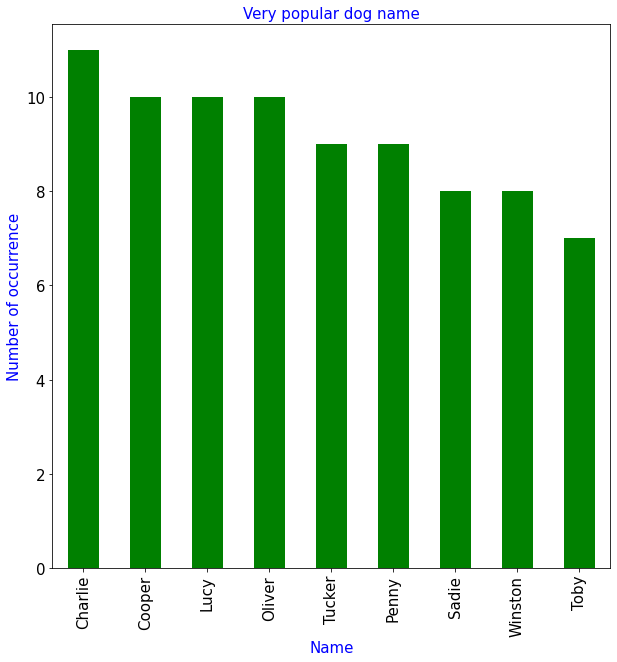

In [127]:
#plot
g_bar = pname.plot.bar(color = 'green', fontsize = 15)

#figure size(width, height)
g_bar.figure.set_size_inches(10,10);

#Add labels
plt.title('Very popular dog name', color = 'blue', fontsize = '15')
plt.xlabel('Name', color = 'blue', fontsize = '15')
plt.ylabel('Number of occurrence', color = 'blue', fontsize = '15');

'Charlie' the very popular dog name.

### Is there any relationship between Favorites and Retweets?

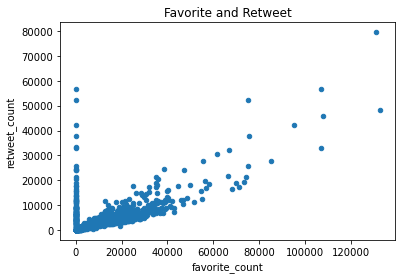

In [128]:
# relationship between Favorites and Retweets
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

In [129]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count']) 

0.7120771236949002

The scatter plot above shows that there is a strong positive relationship between favourites and Retweets.